In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab

from scipy.optimize import curve_fit

In [2]:
df_plurality = pd.read_csv('parallel_merge_plurality.csv', names=['k','node','number_influenced','s'])
df_max = pd.read_csv('parallel_merge_max.csv', names=['k','node','number_influenced','s'])
df_min = pd.read_csv('parallel_merge_min.csv', names=['k','node','number_influenced','s'])
df_random = pd.read_csv('parallel_merge_random.csv', names=['k','node','number_influenced','s'])

In [3]:
def transform_data_plot(df):
    df_t = df.copy()

    # Get only rows with the max k-value
    idx = df_t.groupby(['node','s'])['k'].transform(max) == df_t['k']
    df_t = df_t[idx][['node','number_influenced','s']]
    df_t = df_t.reset_index(drop=True)
    
    # Group by s and calculate the mean
    df_t = df_t[['s','number_influenced']].groupby(by='s',
                                                   as_index=False).mean()
    # Normalize between 0-1
    df_t['number_influenced'] = \
        df_t['number_influenced'].apply(lambda x: x/df_t['number_influenced'].max())
        
    return df_t

In [4]:
def sigmoid(x, x0, k):
    y = 1 / (1 + np.exp(-k*(x-x0)))
    return y


## Plurality

[4.25135099 1.37667993]


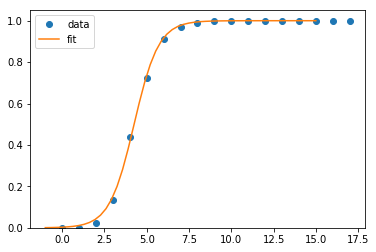

In [5]:
df_plot = transform_data_plot(df_plurality)

xdata = df_plot['s'].values
ydata = df_plot['number_influenced'].values

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(popt)

x = np.linspace(-1, 15, 50)
y = sigmoid(x, *popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit')
pylab.ylim(0, 1.05)
pylab.legend(loc='best')
pylab.show()

## Max

[4.29259885 1.39822414]


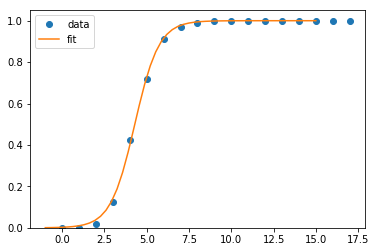

In [6]:
df_plot = transform_data_plot(df_max)

xdata = df_plot['s'].values
ydata = df_plot['number_influenced'].values

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(popt)

x = np.linspace(-1, 15, 50)
y = sigmoid(x, *popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit')
pylab.ylim(0, 1.05)
pylab.legend(loc='best')
pylab.show()

## Min

[3.78619937 0.8742113 ]


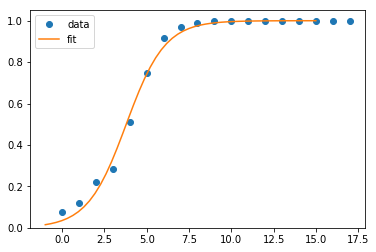

In [7]:
df_plot = transform_data_plot(df_min)

xdata = df_plot['s'].values
ydata = df_plot['number_influenced'].values

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(popt)

x = np.linspace(-1, 15, 50)
y = sigmoid(x, *popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit')
pylab.ylim(0, 1.05)
pylab.legend(loc='best')
pylab.show()

## Random

[4.1040224  1.10707636]


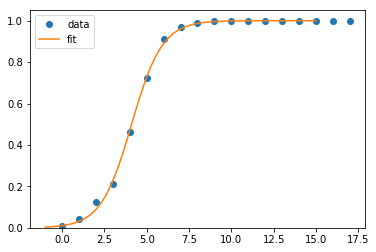

In [8]:
df_plot = transform_data_plot(df_random)

xdata = df_plot['s'].values
ydata = df_plot['number_influenced'].values

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(popt)

x = np.linspace(-1, 15, 50)
y = sigmoid(x, *popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit')
pylab.ylim(0, 1.05)
pylab.legend(loc='best')
pylab.show()